In [ ]:
# Import necessary libraries to manage the information
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

# Import library of firebase
import firebase_admin
from firebase_admin import credentials, firestore

if not firebase_admin._apps:
    cred = credentials.Certificate('')
    firebase_admin.initialize_app(cred)

db = firestore.client()

## **Implementation Business Question JEFFERSON**

*What is the average time taken to load the recommended advertisements and stores for the users?*

The average load time for advertisements and store information is crucial for app performance. Faster load times ensure smooth user experience and efficient resource use, while slow loading can signal inefficiencies and negatively impact performance.

These metrics were obtained from the homepage of the Uniandes member view, where each time the application is launched, the stores and ads recommended by us are loaded through an implemented recommendation algorithm. The measurement is taken from the moment the homepage view is accessed until the recommendations are finally displayed. This measurement is recorded in milliseconds and stored in a collection in Firebase.

Average Time for Stores: 2913.60 ms
Average Time for Advertisements: 6091.20 ms


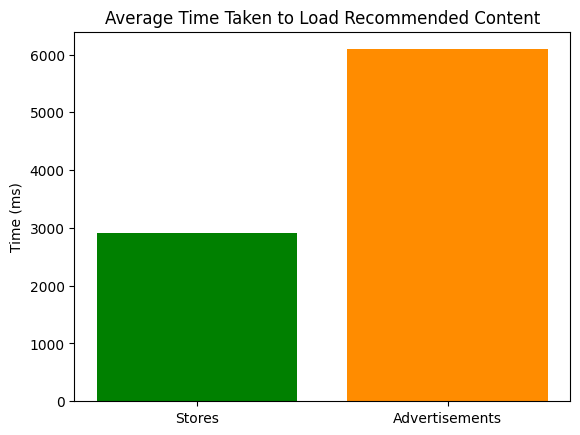

In [23]:
# Fetch data from Firebase
def fetch_data_from_firestore():
    collection_ref = db.collection('AnalyticsBusinessQuestions').document('sprint4').collection('businessQuestion2')
    docs = collection_ref.stream()

    data = []
    for doc in docs:
        doc_data = doc.to_dict()
        data.append(doc_data)
    return data

# Load data into a DataFrame
data = fetch_data_from_firestore()
df = pd.DataFrame(data)

# Ensure correct data types
df['TimeStores'] = pd.to_numeric(df['TimeStores'], errors='coerce')
df['TimeAdvertisements'] = pd.to_numeric(df['TimeAdvertisements'], errors='coerce')

# Calculate averages
average_stores = df['TimeStores'].mean()
average_ads = df['TimeAdvertisements'].mean()

# Display results
print(f"Average Time for Stores: {average_stores:.2f} ms")
print(f"Average Time for Advertisements: {average_ads:.2f} ms")

# Plot the averages with more solid colors
labels = ['Stores', 'Advertisements']
averages = [average_stores, average_ads]

plt.bar(labels, averages, color=['green', 'darkorange'])  # Usando colores más sólidos
plt.title('Average Time Taken to Load Recommended Content')
plt.ylabel('Time (ms)')
plt.show()

# **Bussiness question Andres Garcia**


"What is the average daily usage of the password recovery functionality?"

The goal is to assess whether the current password recovery system is being used excessively, relative to the number of active users in the application. This evaluation will help determine if there is a need to offer alternative ways for users to access their accounts, or if there are signs that someone may be attempting to attack the system by repeatedly making requests to the database and email server.

# **Global view**

In [24]:
# Obtener la colección "passwordChangeClicks"
def fetch_data_from_firestore():
    docs = db.collection('passwordChangeClicks').stream()
    data = []
    for doc in docs:
        data.append(doc.to_dict())
    return pd.DataFrame(data)

df = fetch_data_from_firestore()

print(df.head())

                       address      timestamp
0  Calle 135, Bogotá, Colombia  1733164933286
1  Calle 135, Bogotá, Colombia  1733164995416


In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['date'] = df['timestamp'].dt.date

print(df.head())

                       address               timestamp        date
0  Calle 135, Bogotá, Colombia 2024-12-02 18:42:13.286  2024-12-02
1  Calle 135, Bogotá, Colombia 2024-12-02 18:43:15.416  2024-12-02


In [26]:
clicks_per_day = df.groupby('date').size()

print(clicks_per_day)

average_clicks = clicks_per_day.mean()
print(f"Media de clics por día: {average_clicks}")


date
2024-12-02    2
dtype: int64
Media de clics por día: 2.0


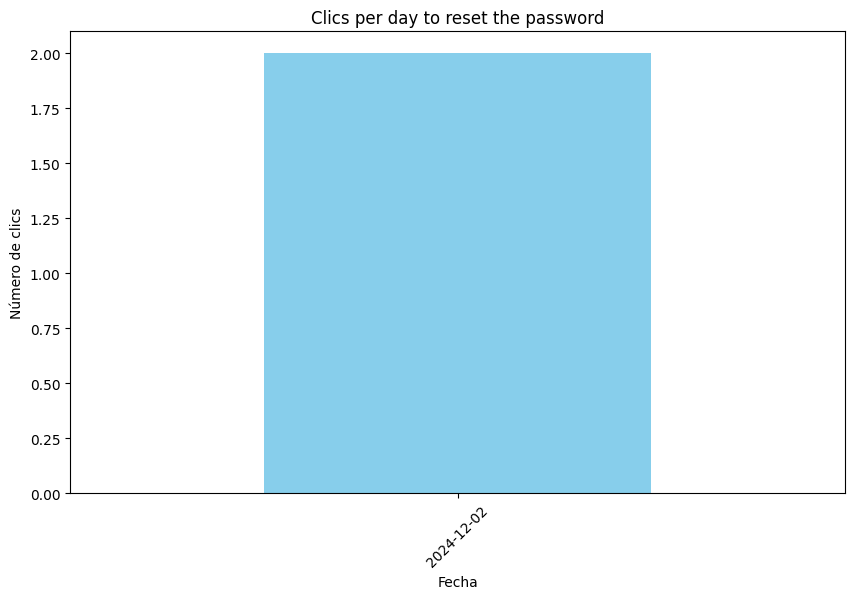

In [27]:
plt.figure(figsize=(10, 6))
clicks_per_day.plot(kind='bar', color='skyblue')
plt.title('Clics per day to reset the password')
plt.xlabel('Fecha')
plt.ylabel('Número de clics')
plt.xticks(rotation=45)
plt.show()

# **Filter by date view**
change the parametes star_date and end_date to the dates than you want to use

In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date  # Solo la parte de la fecha

def filter_data_by_date(df, start_date, end_date):
    """
    Filtra los datos entre dos fechas dadas en formato 'yyyy-mm-dd', incluyendo ambas fechas.
    """
    start = pd.to_datetime(start_date, format='%Y-%m-%d').date()
    end = pd.to_datetime(end_date, format='%Y-%m-%d').date()

    return df[(df['date'] >= start) & (df['date'] <= end)]

start_date = "2023-12-01"
end_date = "2024-12-02"

filtered_df = filter_data_by_date(df, start_date, end_date)

print("data filtered per range of dates")
print(filtered_df.head())

data filtered per range of dates
                       address               timestamp        date
0  Calle 135, Bogotá, Colombia 2024-12-02 18:42:13.286  2024-12-02
1  Calle 135, Bogotá, Colombia 2024-12-02 18:43:15.416  2024-12-02


date
2024-12-02    2
dtype: int64
Mean clicks per day until2023-12-01 to 2024-12-02 es: 2.00


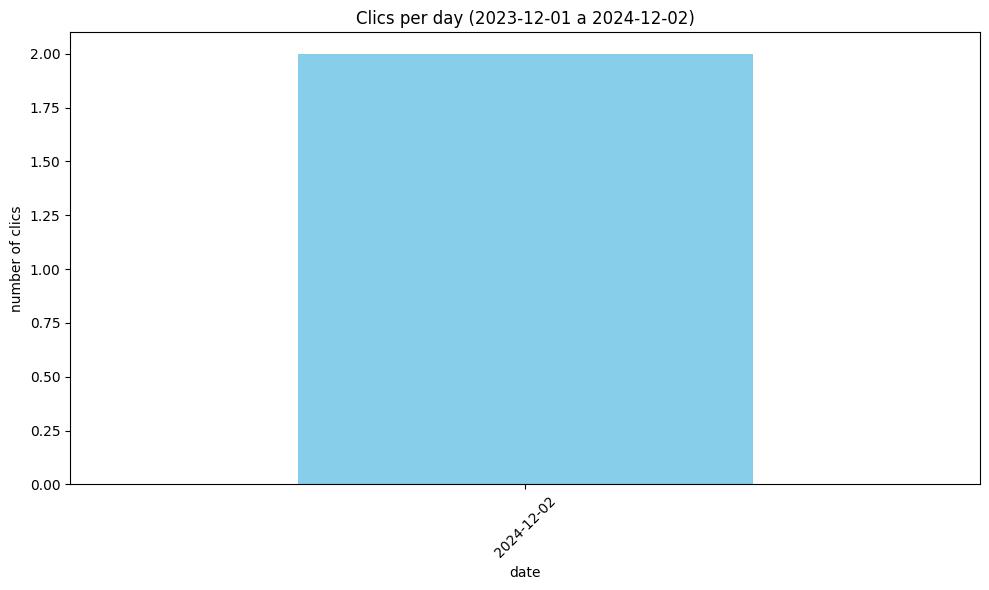

In [29]:
if not filtered_df.empty:
    clicks_per_day_filtered = filtered_df.groupby('date').size()


    print(clicks_per_day_filtered)

    average_clicks_filtered = clicks_per_day_filtered.mean()
    print(f"Mean clicks per day until{start_date} to {end_date} es: {average_clicks_filtered:.2f}")

    clicks_per_day_filtered.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(f"Clics per day ({start_date} a {end_date})")
    plt.xlabel("date")
    plt.ylabel("number of clics")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"there's no data until {start_date} to {end_date}.")


## **Implementation Business Question JUAN**

*What is the optimal size of loyalty cards (e.g., 5 stamps, 10 stamps) for maximizing user engagement across different store categories?*

This question analyzes which loyalty card configurations encourage the highest participation and redemption rates based on the category of the store. Understanding these trends allows businesses to tailor their loyalty programs to align with user preferences and behaviors, increasing the effectiveness of the loyalty system and driving repeat visits to their stores.

Category-wise loyalty card performance:

Category: Restaurant
  - Max Points: 10, Total Cards: 15, Avg Points Earned: 5.73
  - Max Points: 5, Total Cards: 6, Avg Points Earned: 3.00
  - Max Points: 8, Total Cards: 1, Avg Points Earned: 4.00
  - Max Points: 6, Total Cards: 2, Avg Points Earned: 4.00

Category: Other
  - Max Points: 10, Total Cards: 7, Avg Points Earned: 7.29

Category: Coffee
  - Max Points: 5, Total Cards: 1, Avg Points Earned: 3.00


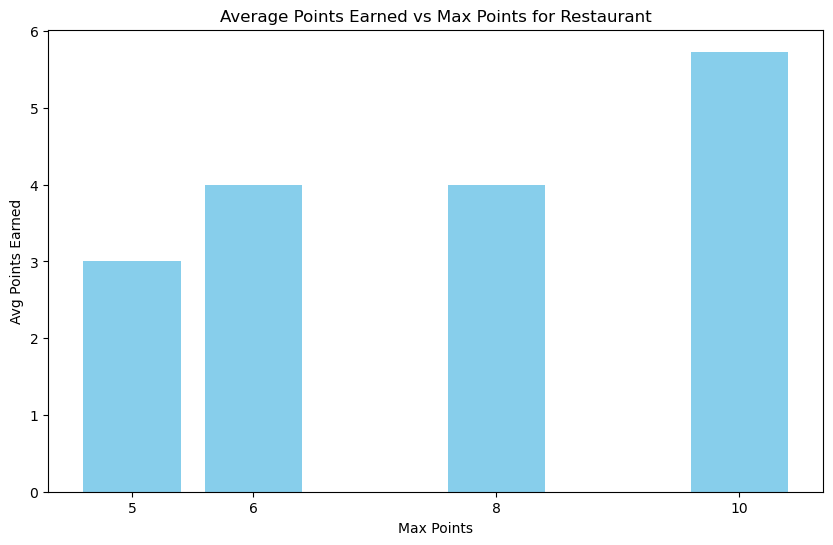

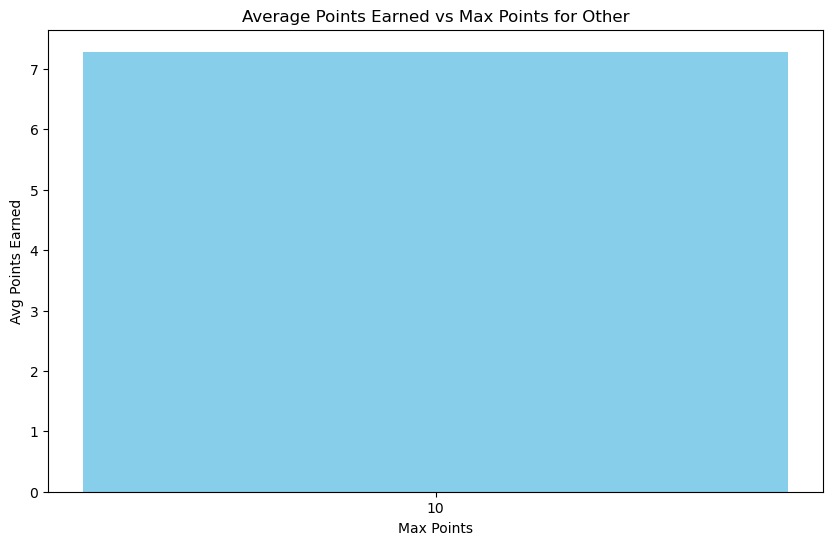

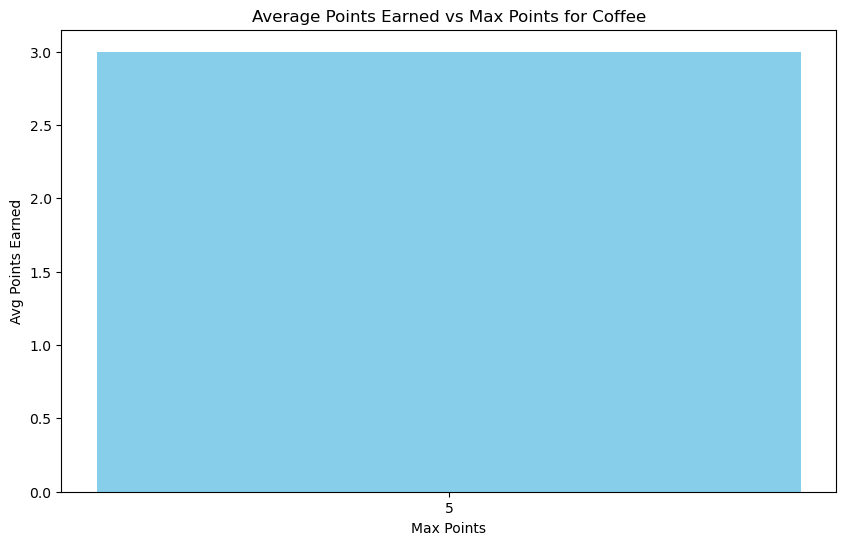

In [6]:
# Import necessary libraries
from collections import defaultdict

# Step 1: Fetch data from Firestore
def fetch_firestore_data():
    # Fetch loyalty cards
    loyalty_cards_ref = db.collection("loyaltyCards").stream()
    loyalty_cards = [
        {
            "storeId": card.get("storeId"),
            "maxPoints": card.get("maxPoints"),
            "points": card.get("points"),
        }
        for card in loyalty_cards_ref
    ]

    # Fetch stores
    stores_ref = db.collection("stores").stream()
    stores = [
        {
            "id": store.id,
            "category": store.get("category"),
        }
        for store in stores_ref
    ]

    return loyalty_cards, stores

# Step 2: Analyze optimal loyalty card size
def analyze_loyalty_cards(loyalty_cards, stores):
    # Create a mapping of storeId to category
    store_category_map = {store["id"]: store["category"] for store in stores}

    # Initialize a dictionary to hold metrics for each category and maxPoints
    category_metrics = defaultdict(lambda: defaultdict(lambda: {"totalCards": 0, "totalPoints": 0}))

    # Aggregate metrics
    for card in loyalty_cards:
        store_id = card["storeId"]
        max_points = card["maxPoints"]
        points = card["points"]

        # Skip cards with missing data or stores not found in the store-category mapping
        if not store_id or not max_points or store_id not in store_category_map:
            continue

        category = store_category_map[store_id]

        # Update metrics
        category_metrics[category][max_points]["totalCards"] += 1
        category_metrics[category][max_points]["totalPoints"] += points

    return category_metrics

# Step 3: Calculate average engagement and visualize
def calculate_and_visualize_metrics(category_metrics):
    data = []

    print("Category-wise loyalty card performance:")
    for category, card_sizes in category_metrics.items():
        print(f"\nCategory: {category}")
        for max_points, metrics in card_sizes.items():
            total_cards = metrics["totalCards"]
            total_points = metrics["totalPoints"]
            avg_points = total_points / total_cards if total_cards > 0 else 0

            print(f"  - Max Points: {max_points}, Total Cards: {total_cards}, Avg Points Earned: {avg_points:.2f}")

            # Store data for visualization
            data.append([category, max_points, total_cards, avg_points])

    # Create a DataFrame for visualization
    df = pd.DataFrame(data, columns=["Category", "Max Points", "Total Cards", "Avg Points Earned"])

    # Visualize the results
    for category in df["Category"].unique():
        category_data = df[df["Category"] == category]
        plt.figure(figsize=(10, 6))
        plt.bar(category_data["Max Points"], category_data["Avg Points Earned"], color="skyblue")
        plt.title(f"Average Points Earned vs Max Points for {category}")
        plt.xlabel("Max Points")
        plt.ylabel("Avg Points Earned")
        plt.xticks(category_data["Max Points"])
        plt.show()

# Main Execution
loyalty_cards, stores = fetch_firestore_data()
category_metrics = analyze_loyalty_cards(loyalty_cards, stores)
calculate_and_visualize_metrics(category_metrics)
